In [1]:
from __future__ import print_function
import os
data_path = ['data']

In [2]:
import pandas as pd

# Import the data using the file path
filepath = os.sep.join(data_path + ['healthcare-dataset-stroke-data.csv'])
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.head(1).T

,0
id,9046
gender,Male
age,67.0
hypertension,0
heart_disease,1
ever_married,Yes
work_type,Private
Residence_type,Urban
avg_glucose_level,228.69
bmi,36.6


In [4]:
# Remove extraneous columns
data.drop(['ever_married','work_type'], axis=1, inplace=True)
data.fillna(0, inplace=True)

data

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,0,0,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Rural,166.29,25.6,formerly smoked,0


In [5]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease',
       'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status',
       'stroke'],
      dtype='object')

In [6]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

for col in ['gender', 'Residence_type', 'smoking_status']:
    data[col] = lb.fit_transform(data[col])

/opt/intel/oneapi/intelpython/latest/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [7]:
# Mute the sklearn warning
import warnings
warnings.filterwarnings('ignore', module='sklearn')

from sklearn.preprocessing import MinMaxScaler

msc = MinMaxScaler()

data = pd.DataFrame(msc.fit_transform(data),  # this is an np.array, not a dataframe.
                    columns=data.columns)
data

,id,gender,age,hypertension,heart_disease,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1.0,0.816895,0.0,1.0,0.0,0.801265,0.375000,0.0,1.0
1,0.708205,0.0,0.743652,0.0,0.0,1.0,0.679023,0.000000,0.0,1.0
2,0.426015,0.0,0.975586,0.0,1.0,1.0,0.234512,0.332992,0.0,1.0
3,0.824928,0.0,0.597168,0.0,0.0,0.0,0.536008,0.352459,0.0,1.0
4,0.021929,0.0,0.963379,1.0,0.0,1.0,0.549349,0.245902,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
5105,0.249297,0.0,0.975586,1.0,0.0,1.0,0.132167,0.000000,0.0,0.0
5106,0.614850,0.0,0.987793,0.0,0.0,1.0,0.323516,0.409836,0.0,0.0
5107,0.269730,0.0,0.426270,0.0,0.0,1.0,0.128658,0.313525,0.0,0.0
5108,0.514278,1.0,0.621582,0.0,0.0,0.0,0.513203,0.262295,0.0,0.0


In [8]:
# Get a list of all the columns that don't contain the label
x_cols = [x for x in data.columns if x != 'stroke']

# Split the data into two dataframes
X_data = data[x_cols]
y_data = data['stroke']

# # alternatively:
# X_data = data.copy()
# y_data = X_data.pop('churned')
X_data
y_data

0       1.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
5105    0.0
5106    0.0
5107    0.0
5108    0.0
5109    0.0
Name: stroke, Length: 5110, dtype: float64

In [9]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

In [10]:
def accuracy(real, predict):
    return sum(y_data == y_pred) / float(real.shape[0])

In [11]:
print(accuracy(y_data, y_pred))

0.9553816046966732


In [12]:
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

0.9804305283757339


In [13]:
knn = KNeighborsClassifier(n_neighbors=5, p=1)

knn = knn.fit(X_data, y_data)

y_pred = knn.predict(X_data)

print(accuracy(y_data, y_pred))

0.9549902152641878


In [14]:
# Fit the K-nearest neighbors model with different values of k
# Store the accuracy measurement for each k

score_list = list()

for k in range(1, 21):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_data, y_data)
    
    y_pred = knn.predict(X_data)
    score = accuracy(y_data, y_pred)
    
    score_list.append((k, score))
    
score_df = pd.DataFrame(score_list, columns=['k', 'accuracy'])

In [15]:
# Import libraries to make the plot

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

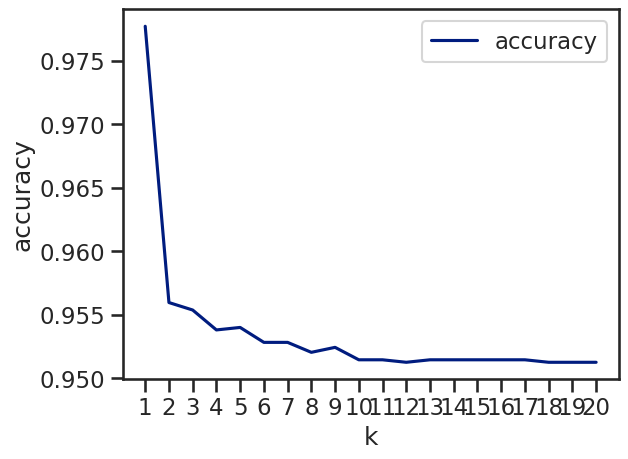

In [16]:
sns.set_context('talk')
sns.set_style('ticks')
sns.set_palette('dark')

ax = score_df.set_index('k').plot()

ax.set(xlabel='k', ylabel='accuracy')
ax.set_xticks(range(1, 21));